In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyquaternion import Quaternion
from scipy import integrate

In [2]:
from scipy.signal import find_peaks

In [3]:
plt.rcParams['figure.figsize'] = [15, 8]

# Capture 0

In [4]:
folder = "./2021_05_28_10_58_20"

In [5]:
imufile = folder + "/gyro_accel.csv"
viconfile = folder + "/vicon_capture_quaternion.csv"
# viconfile = folder + "/vicon_capture_helical.csv"

In [6]:
imu_data = pd.read_csv(imufile)

In [7]:
vicon_data = pd.read_csv(viconfile)

## IMU data description
- Timestamp  nanosec
- gx/gy/gz   rad/s
- ax/ay/az   m/s^2

In [8]:
imu_data.head()

,Timestamp,gx,gy,gz,ax,ay,az
0,842423366078421,0.109956,0.409891,-0.109345,-0.392649,0.292093,10.472239
1,842423371083344,0.130725,0.326813,-0.108734,-0.565032,0.318429,10.326192
2,842423376108344,0.136834,0.277333,-0.103847,-0.682347,0.359130,10.184934
3,842423381444575,0.141721,0.230296,-0.097128,-0.785298,0.407014,10.060435
4,842423386097882,0.146608,0.191201,-0.083689,-0.802058,0.423774,9.955091


In [9]:
imu_data.describe()

,Timestamp,gx,gy,gz,ax,ay,az
count,2.725200e+05,272520.000000,272520.000000,272520.000000,272520.000000,272520.000000,272520.000000
mean,8.431047e+14,0.001734,0.008972,0.006138,-0.150023,1.147971,9.154533
std,3.933495e+11,0.190561,0.163788,0.131503,2.771318,1.368308,1.595713
min,8.424234e+14,-8.009054,-2.070222,-2.426357,-16.847998,-24.914062,-17.599777
25%,8.427640e+14,-0.036041,-0.051924,-0.028100,-0.648829,0.548272,8.777143
50%,8.431047e+14,0.001833,0.009774,0.001833,-0.193930,0.780510,9.481039
75%,8.434453e+14,0.039706,0.070860,0.032987,0.258574,1.058237,9.758766
max,8.437860e+14,3.734830,3.619377,3.433063,8.228871,5.925649,70.001670


## Vicon data description

- RX/RY/RZ/RW  quaternion
- TX/TY/TZ     mm

In [10]:
vicon_data.head()

,Frame,Sub Frame,RX,RY,RZ,RW,TX,TY,TZ
0,1,0,0.023864,0.000793,-0.694092,0.719491,-2755.17,-2283.99,919.116
1,2,0,0.024528,0.000193,-0.693316,0.720216,-2755.10,-2283.41,919.534
2,3,0,0.023071,0.000614,-0.694185,0.719426,-2755.03,-2283.24,919.485
3,4,0,0.021743,0.000635,-0.694314,0.719343,-2754.66,-2283.62,919.314
4,5,0,0.022890,-0.000271,-0.693711,0.719889,-2754.65,-2282.65,919.853


In [11]:
vicon_data.describe()

,Frame,Sub Frame,RX,RY,RZ,RW,TX,TY,TZ
count,136020.000000,136020.0,136020.000000,136020.000000,136020.000000,136020.000000,136020.000000,136020.000000,136020.000000
mean,68010.500000,0.0,0.055116,-0.003209,0.014795,0.947254,-32.499359,-96.780793,197.829585
std,39265.736145,0.0,0.065935,0.146404,0.133946,0.236050,449.237310,333.084837,155.228644
min,1.000000,0.0,-0.226736,-0.448202,-0.822999,-0.768824,-2798.170000,-2283.990000,78.416200
25%,34005.750000,0.0,0.022602,-0.018828,-0.006460,0.974358,-31.001575,-41.078525,144.694000
50%,68010.500000,0.0,0.033883,0.000804,0.002211,0.998129,41.491500,-26.401250,172.121000
75%,102015.250000,0.0,0.048096,0.018275,0.011034,0.999259,118.299250,-19.330350,198.028000
max,136020.000000,0.0,0.270754,0.460506,0.981978,0.999997,358.218000,61.321200,1447.990000


## Timestamp alignment

### IMU Start

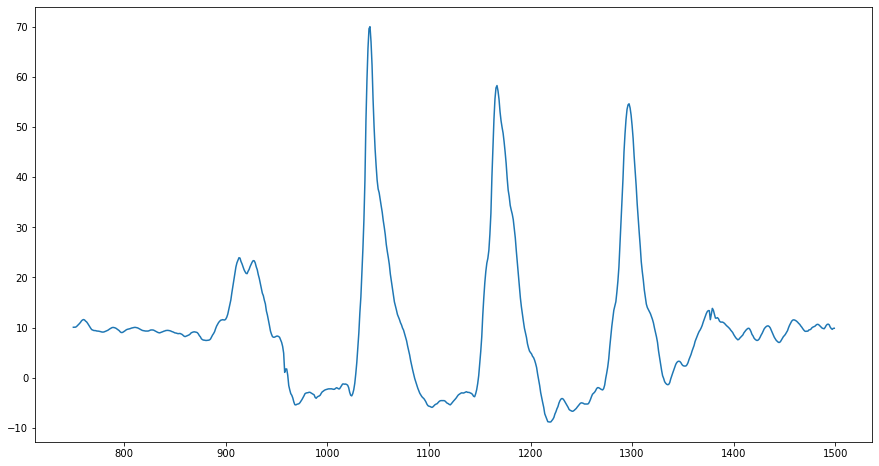

In [12]:
plt.plot(imu_data['az'][750:1500])

In [13]:
from scipy import integrate
y_int = integrate.cumtrapz(imu_data['az'][750:1500]-9.8, initial=0)
y_int = integrate.cumtrapz(y_int, initial=0)
# in later versions of scipy, this function is called cumulative_trapezoid

In [14]:
y_int.shape

(750,)

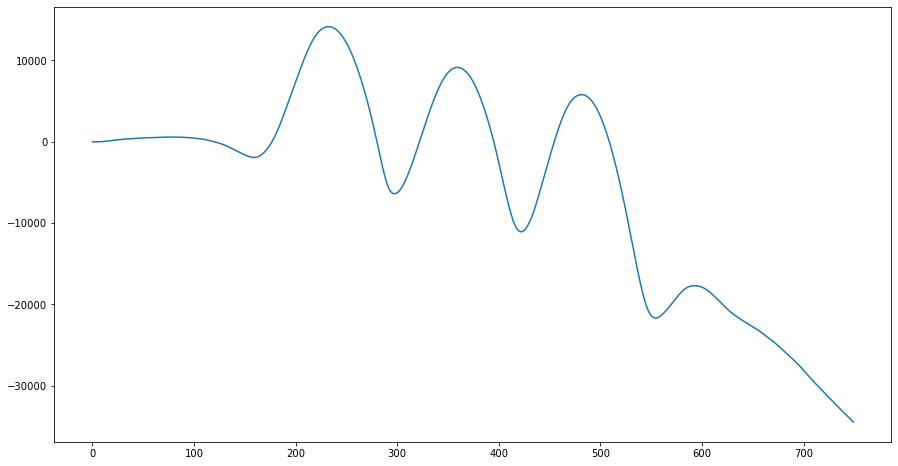

In [15]:
plt.plot(y_int)

In [16]:
find_peaks(imu_data['az'][750:1500], height=40, width = 10)

(array([292, 417, 547]),
 {'peak_heights': array([70.00167 , 58.262897, 54.63329 ]),
  'prominences': array([75.4197484, 64.176575 , 56.021927 ]),
  'left_bases': array([219, 353, 469]),
  'right_bases': array([469, 469, 585]),
  'widths': array([18.33965959, 26.43070523, 19.78227039]),
  'width_heights': array([32.2917958, 26.1746095, 26.6223265]),
  'left_ips': array([286.10292769, 409.23703966, 538.06384893]),
  'right_ips': array([304.44258728, 435.66774489, 557.84611932])})

In [17]:
find_peaks(y_int, height=2000, width = 10)

(array([233, 359, 481]),
 {'peak_heights': array([14155.6091525 ,  9148.32056433,  5794.88189385]),
  'prominences': array([16084.0343618 , 15532.62053065, 16856.94229058]),
  'left_bases': array([159, 297, 422]),
  'right_bases': array([749, 749, 749]),
  'widths': array([71.75719151, 66.63319949, 66.24634148]),
  'width_heights': array([ 6113.5919716 ,  1382.01029901, -2633.58925144]),
  'left_ips': array([196.29136447, 325.492473  , 448.2447237 ]),
  'right_ips': array([268.04855598, 392.12567249, 514.49106518])})

### IMU End

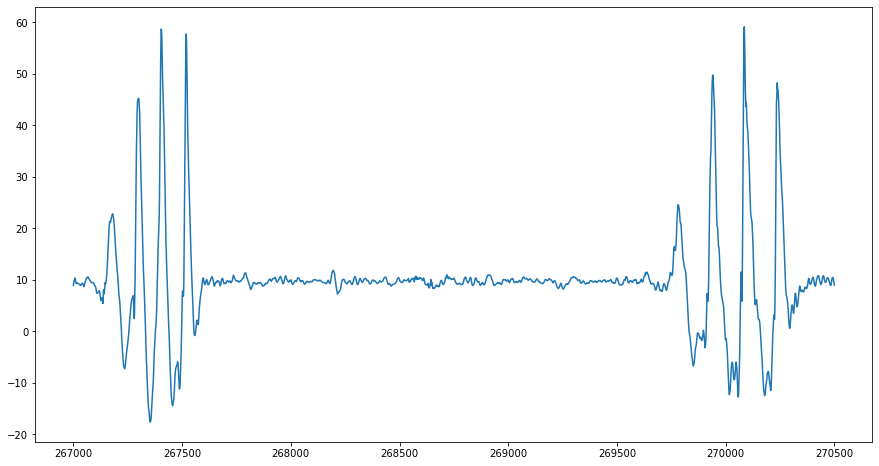

In [18]:
plt.plot(imu_data['az'][267000:270500])

In [19]:
find_peaks(imu_data['az'][267000:270500], height=40, width = 10)

(array([ 300,  404,  519, 2940, 3085, 3237]),
 {'peak_heights': array([45.245625, 58.696247, 57.740963, 49.78503 , 59.15354 , 48.24795 ]),
  'prominences': array([52.4785085 , 73.11413   , 70.475721  , 56.5079485 , 71.622543  ,
         47.65418796]),
  'left_bases': array([ 236,  353,  456, 2851,  353, 3179]),
  'right_bases': array([ 353,  456, 3057, 3057, 3179, 3294]),
  'widths': array([31.4169214 , 29.33193378, 25.40067706, 34.41520049, 35.88667465,
         31.54182411]),
  'width_heights': array([19.00637075, 22.139182  , 22.5031025 , 21.53105575, 23.3422685 ,
         24.42085602]),
  'left_ips': array([ 286.04640722,  394.45964369,  510.63604566, 2924.56676348,
         3078.05681233, 3230.15791708]),
  'right_ips': array([ 317.46332863,  423.79157747,  536.03672272, 2958.98196397,
         3113.94348698, 3261.69974119])})

In [20]:
find_peaks(imu_data['az'], height=40, width = 10)

(array([  1042,   1167,   1297, 267300, 267404, 267519, 269940, 270085,
        270237]),
 {'peak_heights': array([70.00167 , 58.262897, 54.63329 , 45.245625, 58.696247, 57.740963,
         49.78503 , 59.15354 , 48.24795 ]),
  'prominences': array([75.4197484 , 64.176575  , 63.465501  , 52.4785085 , 73.11413   ,
         70.475721  , 56.5079485 , 71.622543  , 47.65418796]),
  'left_bases': array([   969,   1103,   1219, 267236, 267353, 267456, 269851, 267353,
         270179]),
  'right_bases': array([267353, 267353, 267353, 267353, 267456, 270057, 270057, 270179,
         270294]),
  'widths': array([18.33965959, 26.43070523, 21.92440421, 31.4169214 , 29.33193378,
         25.40067706, 34.41520049, 35.88667465, 31.54182411]),
  'width_heights': array([32.2917958 , 26.1746095 , 22.9005395 , 19.00637075, 22.139182  ,
         22.5031025 , 21.53105575, 23.3422685 , 24.42085602]),
  'left_ips': array([  1036.10292769,   1159.23703966,   1287.19510832, 267286.04640722,
         267394.4596

The three anchor points in vicon starting jumps are:

- 1042
- 1167
- 1297
- 267300
- 267404
- 267519
- 269940
- 270085
- 270237

### Vicon Start

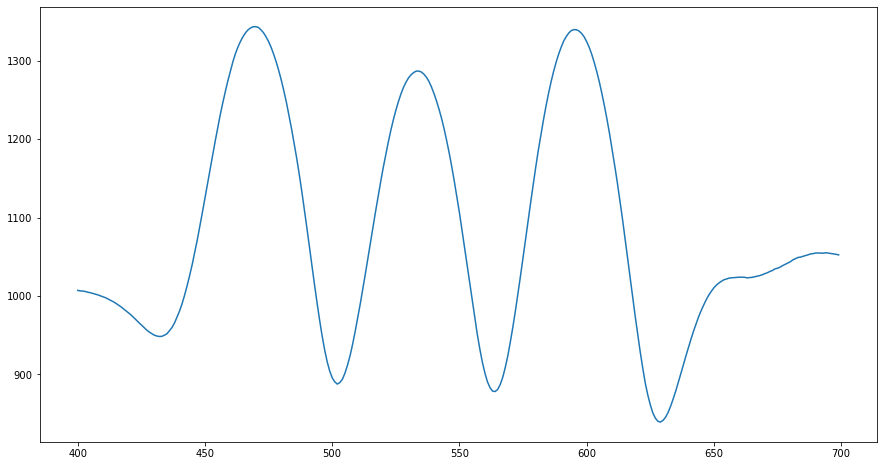

In [21]:
plt.plot(vicon_data['TZ'][400:700])

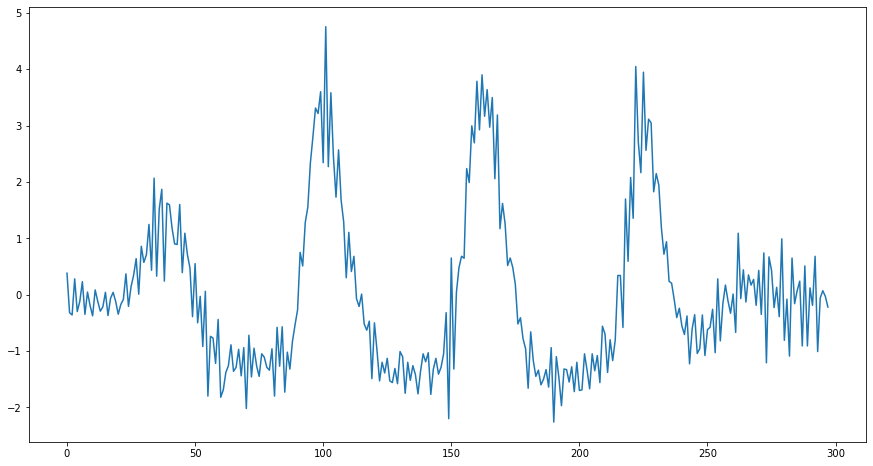

In [22]:
y_grad = np.diff(vicon_data['TZ'][400:700], 2)
plt.plot(y_grad)

In [23]:
find_peaks(-vicon_data['TZ'][400:700], height=-900, width = 10)

(array([102, 164, 229]),
 {'peak_heights': array([-887.528, -878.003, -839.086]),
  'prominences': array([399.422, 461.867, 216.044]),
  'left_bases': array([69, 69, 69]),
  'right_bases': array([134, 195, 294]),
  'widths': array([25.96279923, 27.67695535, 20.97809176]),
  'width_heights': array([-1087.239 , -1108.9365,  -947.108 ]),
  'left_ips': array([ 90.02395876, 149.84905237, 220.21164878]),
  'right_ips': array([115.98675799, 177.52600772, 241.18974054])})

In [24]:
find_peaks(y_grad, height=2, width = 10)

(array([101, 162, 222]),
 {'peak_heights': array([4.754, 3.9  , 4.048]),
  'prominences': array([6.774, 6.1  , 5.275]),
  'left_bases': array([ 70, 149, 190]),
  'right_bases': array([190, 190, 243]),
  'widths': array([14.48317496, 16.42359571, 10.6869507 ]),
  'width_heights': array([1.367 , 0.85  , 1.4105]),
  'left_ips': array([ 93.31734317, 155.12822124, 221.02060899]),
  'right_ips': array([107.80051813, 171.55181696, 231.70755968])})

To think about this physically:

The experimenter takes the phone and jumps 3 times. Each time, at the lowest point, the legs are yet to reach maximum strength. It's only after a while that the muscle will be in full tension. So there should be a slight delay in max acceleration relative to lowest point. 

As demonstrated here, the peaks of TZ's 2nd-derivative are slightly later than valleys of TZ.

The three anchor points in vicon starting jumps are:

- 501
- 562
- 622

### Vicon End

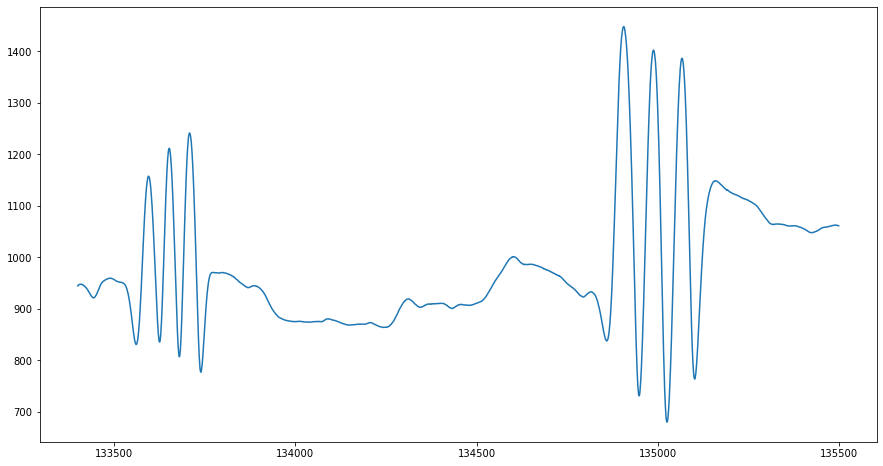

In [25]:
plt.plot(vicon_data['TZ'][133400:135500])

#### Part 1

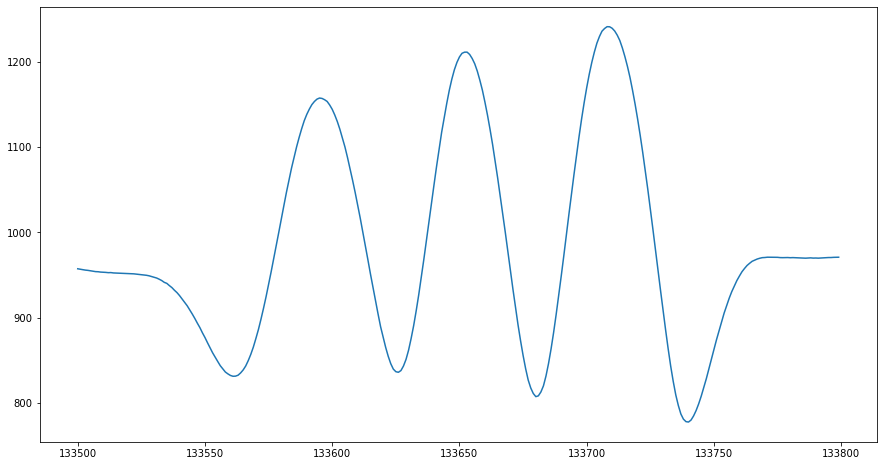

In [26]:
plt.plot(vicon_data['TZ'][133500:133800])

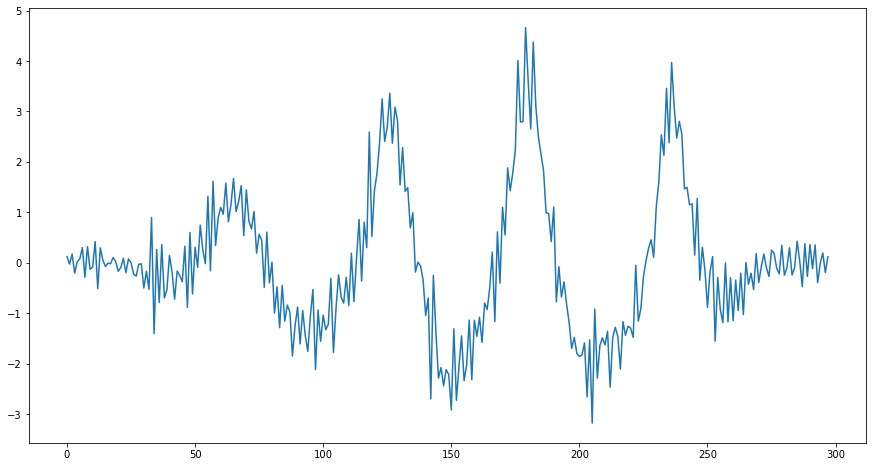

In [27]:
y_grad = np.diff(vicon_data['TZ'][133500:133800], 2)
plt.plot(y_grad)

In [28]:
find_peaks(y_grad, height=2, width = 10)

(array([126, 179, 236]),
 {'peak_heights': array([3.362, 4.661, 3.97 ]),
  'prominences': array([5.482, 7.581, 5.526]),
  'left_bases': array([ 97, 150, 205]),
  'right_bases': array([150, 205, 253]),
  'widths': array([16.20509683, 16.94624584, 12.63153058]),
  'width_heights': array([0.621 , 0.8705, 1.207 ]),
  'left_ips': array([119.10952903, 171.24136637, 230.20325203]),
  'right_ips': array([135.31462585, 188.18761221, 242.83478261])})

- 133626
- 133679
- 133736

#### Part 2

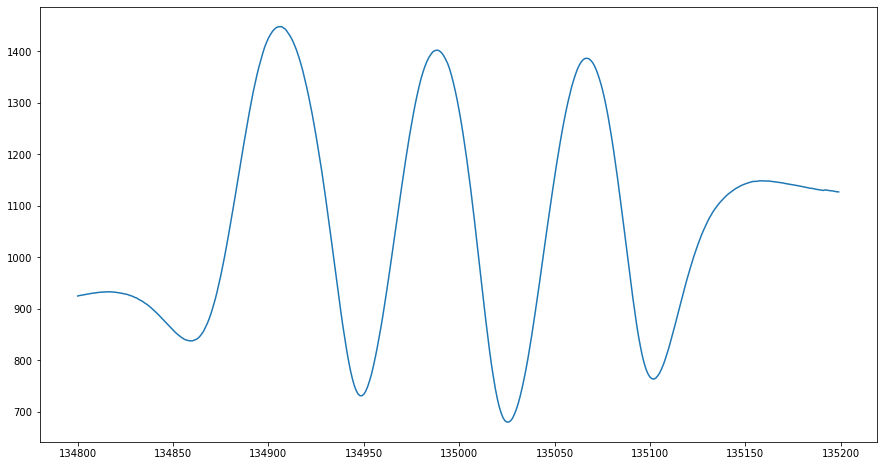

In [29]:
plt.plot(vicon_data['TZ'][134800:135200])

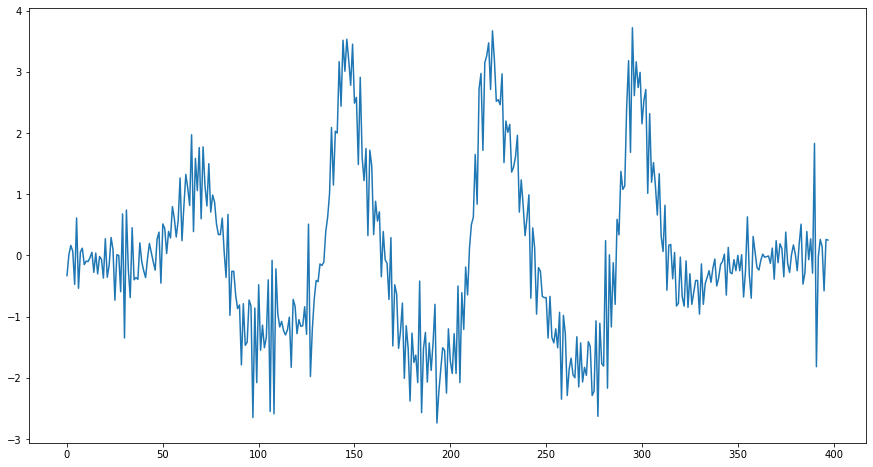

In [30]:
y_grad = np.diff(vicon_data['TZ'][134800:135200], 2)
plt.plot(y_grad)

In [31]:
find_peaks(y_grad, height=2, width = 10)

(array([146, 222, 295]),
 {'peak_heights': array([3.532, 3.669, 3.721]),
  'prominences': array([6.182, 6.299, 5.541]),
  'left_bases': array([ 97, 193, 193]),
  'right_bases': array([193, 277, 391]),
  'widths': array([21.6892285 , 27.47520243, 18.80016918]),
  'width_heights': array([0.441 , 0.5195, 0.9505]),
  'left_ips': array([135.2278481, 211.125    , 288.593359 ]),
  'right_ips': array([156.9170766 , 238.60020243, 307.39352818])})

- 134946
- 135022
- 135095

## Fit

In [51]:
imu_frames = [1042, 1167, 1297, 267300, 267404, 267519, 269940, 270085, 270237]

In [44]:
vicon_frames = [ 501, 562, 622, 133626, 133679, 133736, 134946, 135022, 135095]

In [45]:
imu_frames = np.array(imu_frames).reshape(-1, 1)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
regressor = LinearRegression().fit(imu_frames, vicon_frames)

In [48]:
regressor.coef_

array([0.49999846])

In [49]:
regressor.intercept_

-22.668173836456845

## Fit Timestamp

In [59]:
timestamp_y = np.array(imu_data.iloc[imu_frames,0]).reshape(-1, 1)

In [71]:
timestamp_y

array([[842428576089587],
       [842429201069819],
       [842429851094436],
       [843759866488711],
       [843760386508328],
       [843760961489945],
       [843773066064108],
       [843773791039802],
       [843774551049420]])

In [60]:
viconindex_x = np.array(vicon_frames).reshape(-1, 1)

In [72]:
viconindex_x

array([[   501],
       [   562],
       [   622],
       [133626],
       [133679],
       [133736],
       [134946],
       [135022],
       [135095]])

In [61]:
ts_regressor = LinearRegression().fit(viconindex_x, timestamp_y)

In [67]:
ts_regressor.coef_

array([[10000032.14994258]])

In [68]:
ts_regressor.intercept_

array([8.42423593e+14])

In [66]:
ts_regressor.predict([[501]])

array([[8.42428603e+14]])

In [70]:
ts_regressor.predict([[601]])

array([[8.42429603e+14]])

## Align

In [39]:
imu_start = 4000
imu_end = 264000

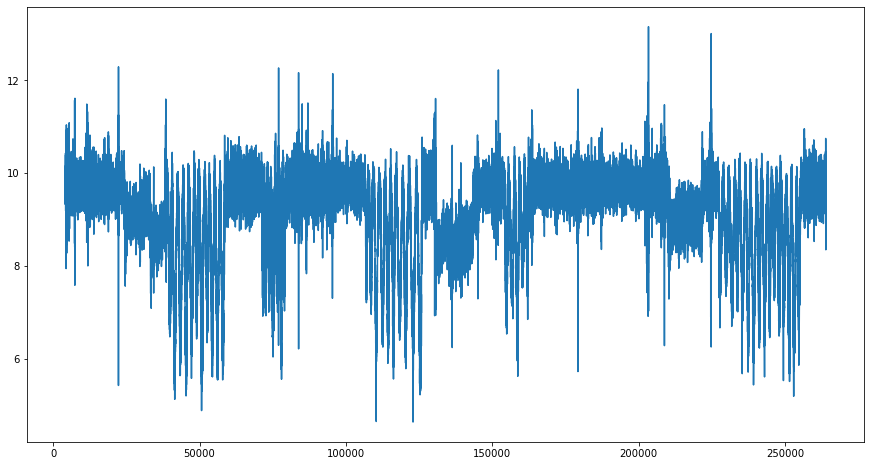

In [40]:
plt.plot(imu_data['az'][4000:264000])

In [41]:
regressor.predict([[4000]])

array([1977.32567159])

In [42]:
regressor.predict([[264000]])

array([131976.92562405])

In [43]:
vicon_start = 1977
vicon_end = 131977

In [44]:
imu_excerpt = imu_data[:][4000:264000].reset_index()

In [45]:
imu_excerpt.head()

,index,Timestamp,gx,gy,gz,ax,ay,az
0,4000,842443366072485,0.004276,-0.153938,0.082467,0.158017,1.132457,10.031705
1,4001,842443371077409,0.039706,-0.141721,0.061697,0.234632,1.113304,10.093954
2,4002,842443376102639,0.060476,-0.129503,0.045204,0.282516,1.115698,10.074801
3,4003,842443381772793,0.082467,-0.113621,0.031765,0.265756,1.130063,10.038888
4,4004,842443386091947,0.098349,-0.096517,0.018326,0.268151,1.173159,9.931149


In [46]:
vicon_excerpt = vicon_data[:][1977:131977].reset_index()

In [47]:
vicon_excerpt.head()

,index,Frame,Sub Frame,RX,RY,RZ,RW,TX,TY,TZ
0,1977,1978,0,0.044547,0.012538,-0.016941,0.998785,22.2220,-31.9920,202.691
1,1978,1979,0,0.044214,0.011957,-0.016978,0.998806,22.1917,-32.0056,202.112
2,1979,1980,0,0.044636,0.011317,-0.016494,0.998803,22.0987,-31.9445,201.620
3,1980,1981,0,0.044762,0.009797,-0.016085,0.998820,22.0148,-31.8698,201.227
4,1981,1982,0,0.045093,0.009455,-0.016081,0.998809,21.9750,-31.7847,200.805


In [48]:
vicon_excerpt = np.array(vicon_excerpt)

In [49]:
imu_excerpt = np.array(imu_excerpt)

In [50]:
# change vicon data from (x, y, z, w) to (w, x, y, z)
rx = vicon_excerpt[:, 3].copy()
ry = vicon_excerpt[:, 4].copy()
rz = vicon_excerpt[:, 5].copy()
rw = vicon_excerpt[:, 6].copy()
vicon_excerpt[:, 3] = rw
vicon_excerpt[:, 4] = rx
vicon_excerpt[:, 5] = ry
vicon_excerpt[:, 6] = rz

## Subtract Gravity

In [53]:
gravity = np.array([0,0,9.8])
for i in range(130000):
    q = Quaternion(vicon_excerpt[i][3:7])
    gravity_r = q.conjugate.rotate(gravity)
    imu_excerpt[2*i][5:8] = imu_excerpt[2*i][5:8] - gravity_r
    imu_excerpt[2*i+1][5:8] = imu_excerpt[2*i+1][5:8] - gravity_r

In [80]:
imu_excerpt[0]

array([ 4.00000000e+03,  8.42443366e+14,  4.27605700e-03, -1.53938040e-01,
        8.24668100e-02, -7.26374264e-02,  2.00869051e+00,  2.73681945e-01])

## Rotate IMU

In [51]:
imu_rotated = imu_excerpt.copy()

In [55]:
for i in range(130000):
    q = Quaternion(vicon_excerpt[i][3:7])
    imu_rotated[2*i][5:8] = q.rotate(imu_excerpt[2*i][5:8])
    imu_rotated[2*i+1][5:8] = q.rotate(imu_excerpt[2*i+1][5:8])

In [64]:
imu_rotated[:, 5].mean()

-0.17365127591622925

In [63]:
np.median(imu_rotated[:, 5])

-0.17366677302936784

In [60]:
imu_rotated[:, 6].mean()

0.13417905799068466

In [65]:
np.median(imu_rotated[:, 6])

0.13657684885170124

In [61]:
imu_rotated[:, 7].mean()

9.750366716686157

In [66]:
np.median(imu_rotated[:, 7])

9.74649254158664

In [67]:
imu_rotated[:, 5] = imu_rotated[:, 5].copy() - imu_rotated[:, 5].mean()
imu_rotated[:, 6] = imu_rotated[:, 6].copy() - imu_rotated[:, 6].mean()
imu_rotated[:, 7] = imu_rotated[:, 7].copy() - imu_rotated[:, 7].mean()

## Brute Force Integration

In [71]:
acc_rotated = np.zeros((260000, 3))

In [56]:
for i in range(130000):
    q = Quaternion(vicon_excerpt[i][3:7])
    acc_rotated[2*i] = q.rotate(imu_excerpt[2*i][5:8].copy())
    acc_rotated[2*i+1] = q.rotate(imu_excerpt[2*i+1][5:8].copy())

In [72]:
acc_rotated = imu_rotated[:,5:8].copy()

In [74]:
acc_int = np.zeros((260000, 9))

In [75]:
v_init = (vicon_excerpt[2][7:] - vicon_excerpt[0][7:]) / 0.02

In [76]:
v_init

array([ -6.165,   2.375, -53.55 ])

In [83]:
acc_int[:,:3] = acc_rotated.copy()
acc_int[:,3] = integrate.cumtrapz(acc_int[:,0], initial=v_init[0])
acc_int[:,4] = integrate.cumtrapz(acc_int[:,1], initial=v_init[1])
acc_int[:,5] = integrate.cumtrapz(acc_int[:,2], initial=v_init[2])
acc_int[:,6] = integrate.cumtrapz(acc_int[:,3], initial=0)
acc_int[:,7] = integrate.cumtrapz(acc_int[:,4], initial=0)
acc_int[:,8] = integrate.cumtrapz(acc_int[:,5], initial=0)

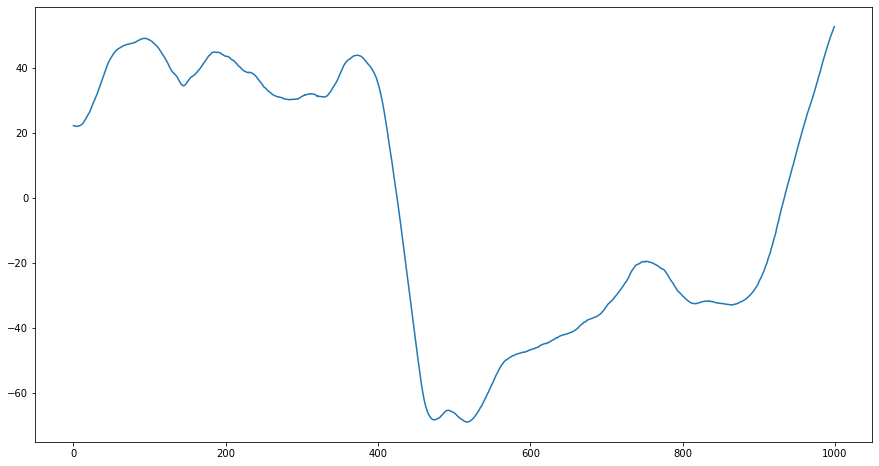

In [84]:
plt.plot(vicon_excerpt[:1000,7])

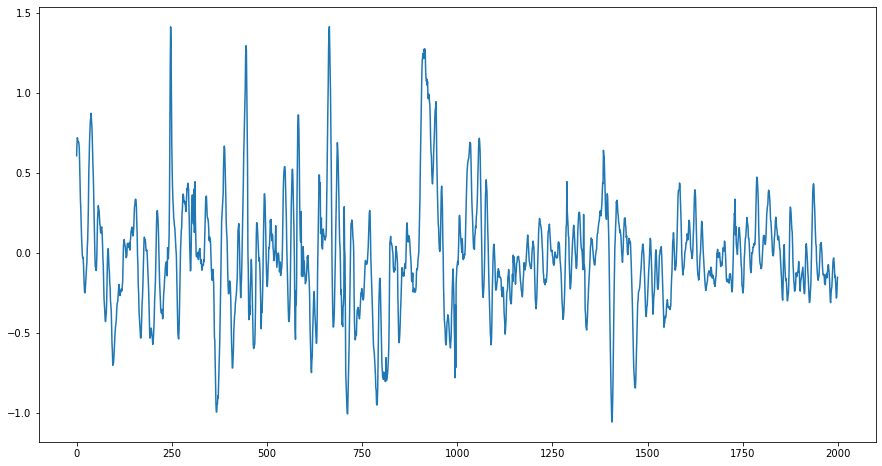

In [85]:
plt.plot(acc_int[:2000,0])

In [90]:
addition = np.array(range(2000))*(20)

In [91]:
addition

array([    0,    20,    40, ..., 39940, 39960, 39980])

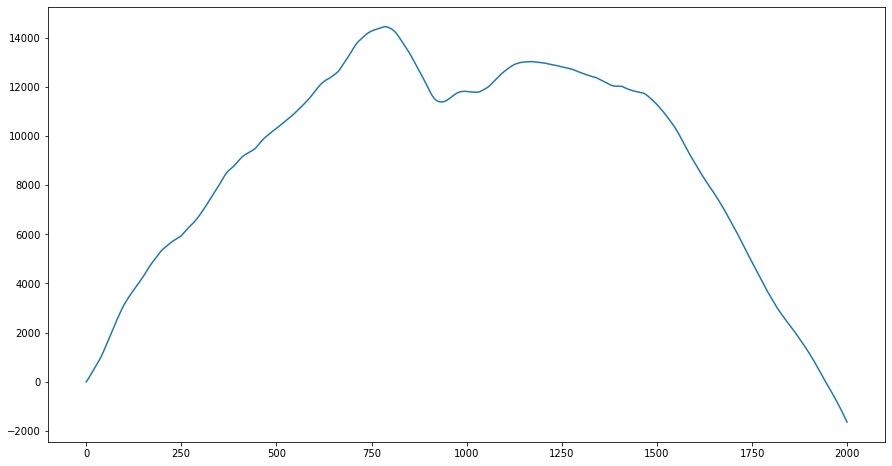

In [92]:
plt.plot(acc_int[:2000,6] + addition)

## Create Data in Stride

In [120]:
# length of imu training data sequence
dl = 50
# interval of vicon sequence
di = int(dl/2)
# stride of imu training data sequence
dt = 10
# stride of vicon sequence
ds = int(dt/2)
# length of data
len_m = int((imu_excerpt.shape[0] - dl) / dt)

In [121]:
len_m

25995

In [135]:
data_x = np.zeros((len_m, dl*12))
data_y = np.zeros((len_m, 7))
data_gt = np.zeros((len_m, 7))

In [123]:
data_x.shape

(25995, 300)

In [125]:
def get_rotation(a, b):
    a = Quaternion(a)
    b = Quaternion(b)
    rotation = a.inverse * b # a * rotation = b
    return rotation.elements

In [133]:
from scipy import integrate

In [136]:
def fill_integrate(a):
    a[:,6] = integrate.cumtrapz(a[:,3], initial=0)
    a[:,7] = integrate.cumtrapz(a[:,4], initial=0)
    a[:,8] = integrate.cumtrapz(a[:,5], initial=0)
    a[:,9] = integrate.cumtrapz(a[:,6], initial=0)
    a[:,10] = integrate.cumtrapz(a[:,7], initial=0)
    a[:,11] = integrate.cumtrapz(a[:,8], initial=0)

In [137]:
for i in range(len_m):
    start_imu = i * dt
    end_imu = start_imu + dl
    start_vicon = i * ds
    end_vicon = start_vicon + di
    imu_tmp = np.zeros((dl, 12))
    imu_tmp[:,:6] = imu_excerpt[start_imu:end_imu,2:8].copy()
    fill_integrate(imu_tmp)
    data_x[i] = imu_tmp.reshape(dl*12)
    data_y[i][0:4] = get_rotation(vicon_excerpt[start_vicon][3:7], 
                                  vicon_excerpt[end_vicon][3:7]) # start * rotation = end
    init_rotation = Quaternion(vicon_excerpt[start_vicon][3:7])
    data_y[i][4:7] = init_rotation.rotate(vicon_excerpt[end_vicon][7:10] - vicon_excerpt[start_vicon][7:10])
    data_gt[i][0:4] = vicon_excerpt[start_vicon][3:7]
    data_gt[i][4:7] = vicon_excerpt[start_vicon][7:10]

In [127]:
imu_excerpt[0:50,2:8].shape

(50, 6)

In [128]:
imu_excerpt.shape

(260000, 8)

In [129]:
data_x.shape

(25995, 300)

In [140]:
np.savetxt('x_50_10_1_int.csv', data_x, delimiter=",")

In [98]:
np.savetxt('y_50_5_1.csv', data_y, delimiter=",")

In [99]:
np.savetxt('gt_50_5_1.csv', data_gt, delimiter=",")

## Verification

In [504]:
len_draw = 30
start_seed = 0
traj_interval = dl//dt

In [505]:
draw_gt = np.zeros((len_draw+1, 3))
draw_y = np.zeros((len_draw+1, 3))
draw_dy = np.zeros((len_draw, 3))
draw_r = []

In [506]:
# draw trajectory from gt
for i in range(len_draw+1):
    i_data = start_seed + i * traj_interval
    draw_gt[i] = data_gt[i_data][4:7] - data_gt[start_seed][4:7]

In [507]:
# draw trajectory from y
draw_r.append(Quaternion(data_gt[start_seed][0:4]))
# draw_r.append(Quaternion([ 0.0459366,  0.0136608, -0.0125507,  0.998772 ]))
# draw_r.append(Quaternion([1,0,0,0]))
for i_draw, i_data in enumerate(range(start_seed, start_seed + len_draw * traj_interval, traj_interval)):
    draw_r.append(draw_r[i_draw] * Quaternion(data_y[i_data][0:4]))
    draw_y[i_draw+1] = draw_y[i_draw] + draw_r[i_draw].inverse.rotate(data_y[i_data][4:7])

In [508]:
data_gt[0][0:4]

array([ 0.998785 ,  0.0445475,  0.012538 , -0.0169407])

In [509]:
draw_r[0]

Quaternion(0.998785, 0.044547500000000004, 0.012537999999999999, -0.0169407)

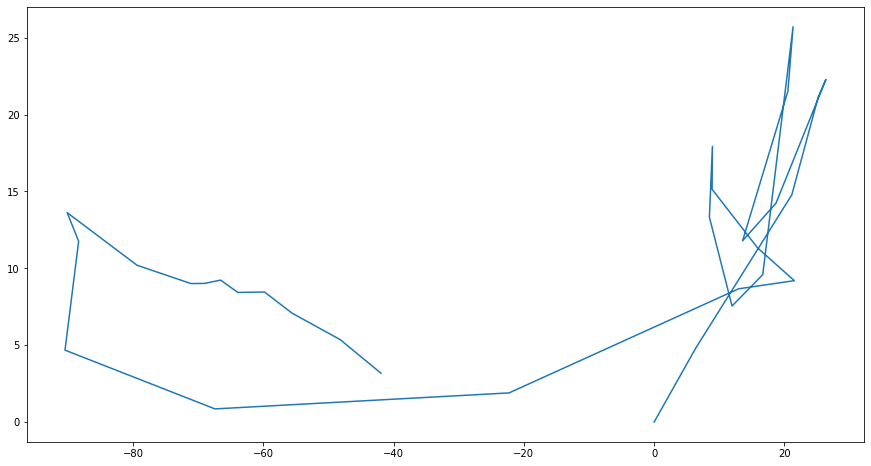

In [511]:
plt.plot(draw_gt[0:,0], draw_gt[:,1])

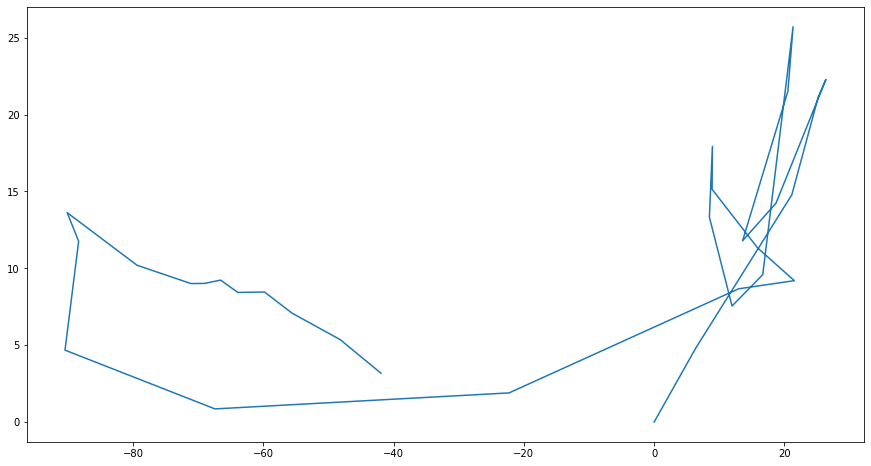

In [513]:
plt.plot(draw_y[:,0], draw_y[:,1])

In [408]:
draw_y[1]

array([20.71030625, 14.32404853,  2.24031979])

In [409]:
draw_gt[1]

array([20.2912, 15.0091,  1.452 ])

## Quaternion Test

In [298]:
q = Quaternion(0.5, 0.5, 0.5, 0.5)

In [327]:
q2 = q * q

In [325]:
q.rotate(q.rotate((1, 0, 0)))

(0.0, 0.0, 1.0)

In [328]:
q2.rotate((1, 0, 0))

(0.0, 0.0, 1.0)

In [329]:
q.inverse * q2

Quaternion(0.5, 0.5, 0.5, 0.5)

In [304]:
q.elements

array([0.5, 0.5, 0.5, 0.5])

In [392]:
data_gt[0]

array([ 9.98772e-01,  4.59366e-02,  1.36608e-02, -1.25507e-02,
        2.41740e+01, -2.95222e+01,  1.97188e+02])

In [394]:
data_gt[20]

array([ 9.98583e-01,  5.20390e-02,  9.03356e-03,  6.43505e-03,
        4.44652e+01, -1.45131e+01,  1.98640e+02])

In [397]:
rotation_gt = get_rotation(data_gt[0][0:4], data_gt[20][0:4])

In [399]:
translation_gt = data_gt[20][4:7] - data_gt[0][4:7]

In [405]:
translation_gt

array([20.2912, 15.0091,  1.452 ])

In [401]:
translation_y = Quaternion(data_gt[0][0:4]).rotate(translation_gt)

In [402]:
translation_y

array([20.71030625, 14.32404853,  2.24031979])

In [406]:
Quaternion(data_gt[0][0:4]).inverse.rotate(translation_y)

array([20.2912, 15.0091,  1.452 ])

In [252]:
np.array(imu_excerpt[['gx','gy','gz','ax','ay','az']][start_imu:end_imu]).reshape(dl*6).reshape(6,200)

array([[-8.55211400e-03,  4.09279730e-02, -4.27605700e-03, ...,
         9.70848750e+00, -1.22173050e-03, -2.44346100e-03],
       [ 4.21497000e-02, -8.11634360e-01,  6.41646000e-01, ...,
        -4.64257600e-02,  1.01403630e-01, -6.36857600e-01],
       [ 7.35019900e-01,  1.02854900e+01,  1.34390350e-02, ...,
        -9.02614060e-01,  8.21211160e-01,  9.98860900e+00],
       [ 1.22783914e-01, -1.19729586e-01, -3.66519160e-03, ...,
         9.11472600e+00,  2.50454750e-02, -2.05250730e-01],
       [ 1.16064400e-02, -5.07570740e-01,  9.88805300e-01, ...,
        -1.03847100e-02,  7.14712400e-02, -6.79953300e-01],
       [ 1.36708920e+00,  9.85453400e+00,  3.48193200e-01, ...,
        -2.34631760e-01,  1.57059630e+00,  9.34935800e+00]])

In [253]:
data_x.shape

(25980, 1200)

In [256]:
loss = pd.read_csv('test_loss.csv')

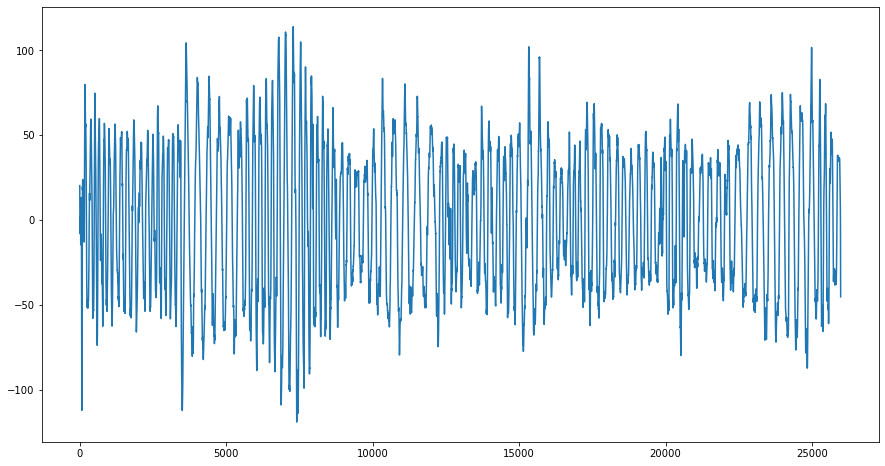

In [261]:
plt.plot(data_y[:, 4])

In [263]:
data_y[:, 4].std()

42.87602749718803

In [267]:
data_original = np.loadtxt('stride_x1.csv', delimiter=",")

In [269]:
data_original.shape

(3810, 1200)

In [271]:
np.transpose(data_original.reshape(3810, 6, 200), (0,2,1))

array([[[  7.6731 , -41.215  , -90.679  , -24.956  , -37.783  ,
          -3.8982 ],
        [  6.1175 , -42.164  , -90.785  , -26.864  , -36.062  ,
          -3.6911 ],
        [  6.3437 , -42.572  , -90.204  , -24.168  , -32.461  ,
          -3.6928 ],
        ...,
        [  3.6277 , -43.832  , -86.023  ,   4.344  ,   3.5395 ,
           5.6816 ],
        [  2.9015 , -44.31   , -85.888  ,   4.7947 ,   6.2003 ,
           5.144  ],
        [  2.0302 , -44.56   , -86.165  ,   4.0614 ,   7.4855 ,
           4.5001 ]],

       [[  5.6924 , -42.511  , -86.829  ,  12.247  ,  -0.4759 ,
          -1.5512 ],
        [  6.4723 , -43.54   , -86.415  ,  10.101  ,  -1.5246 ,
          -0.8059 ],
        [  6.7719 , -43.848  , -85.83   ,   6.2518 ,  -2.2386 ,
          -0.2779 ],
        ...,
        [  2.7338 , -43.351  , -88.801  ,   6.0999 , -11.381  ,
          -7.0974 ],
        [  2.0332 , -43.932  , -88.529  ,   5.0388 , -10.946  ,
          -7.6337 ],
        [  1.587  , -44.387  , -89.04

In [272]:
data_new = np.loadtxt('x.csv', delimiter=",")

In [289]:
len_draw = 30
start_seed = 0
traj_interval = 20
data_drawx = np.zeros((len_draw + 1, 200, 6))
data_drawy = np.zeros((len_draw + 1, 3))
for i_draw, i_data in enumerate(range(start_seed, start_seed + len_draw * traj_interval, traj_interval)):
#     data_drawx[i_draw + 1] = data_x[i_data]
    data_drawy[i_draw + 1] = data_drawy[i_draw] + data_y[i_data][4:7]

In [292]:
def draw_trajectory(gt_trajectory, pred_trajectory, figname):
    plt.rcParams['figure.figsize'] = [15, 10]
    fig, axs = plt.subplots(2, 3)
    axs[0, 0].plot(gt_trajectory[:,0])
    axs[0, 0].plot(pred_trajectory[:,0])
    axs[0, 0].set_title('X-t')
    axs[0, 1].plot(gt_trajectory[:,1])
    axs[0, 1].plot(pred_trajectory[:,1])
    axs[0, 1].set_title('Y-t')
    axs[0, 2].plot(gt_trajectory[:,2])
    axs[0, 2].plot(pred_trajectory[:,2])
    axs[0, 2].set_title('Z-t')
    axs[1, 0].plot(gt_trajectory[:,0], gt_trajectory[:,1])
    axs[1, 0].plot(pred_trajectory[:,0], pred_trajectory[:,1])
    axs[1, 0].set_title('X-Y')
    axs[1, 1].plot(gt_trajectory[:,1], gt_trajectory[:,2])
    axs[1, 1].plot(pred_trajectory[:,1], pred_trajectory[:,2])
    axs[1, 1].set_title('Y-Z')
    axs[1, 2].plot(gt_trajectory[:,0], gt_trajectory[:,2])
    axs[1, 2].plot(pred_trajectory[:,0], pred_trajectory[:,2])
    axs[1, 2].set_title('X-Z')
    fig.savefig(figname)
    

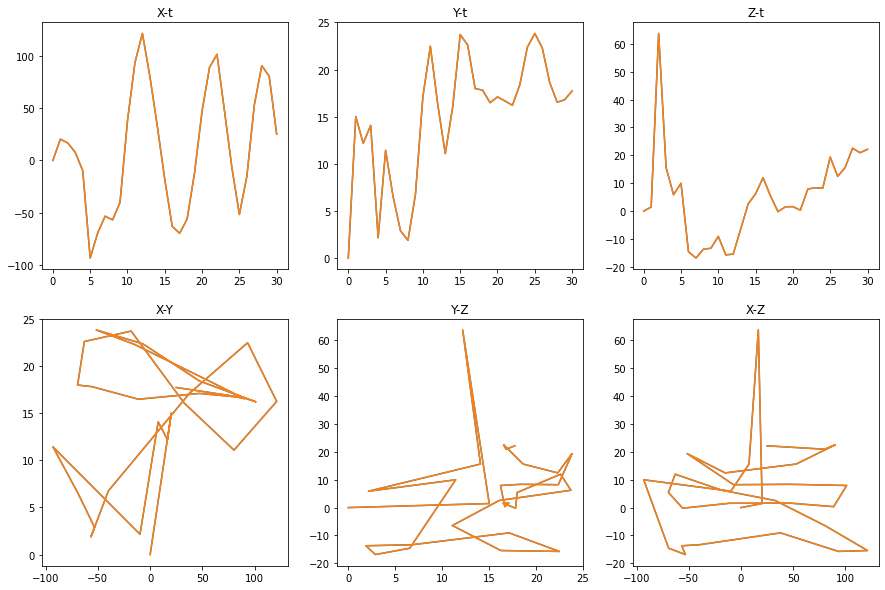

In [293]:
draw_trajectory(data_drawy, data_drawy, "test.jpg")

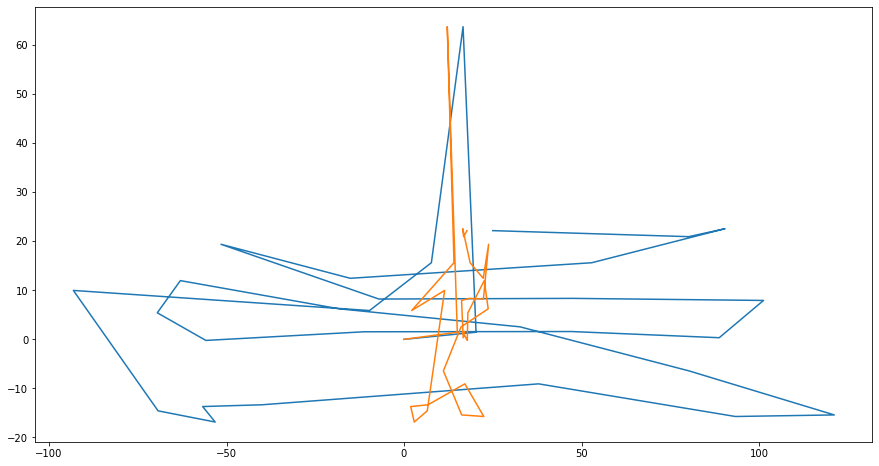

In [291]:
plt.plot(data_drawy[:,0], data_drawy[:,2])
plt.plot(data_drawy[:,1], data_drawy[:,2])

# Capture 1

In [532]:
a = np.ones((3,3))

In [538]:
a

array([[1.41421356, 1.        , 1.        ],
       [1.41421356, 1.        , 1.        ],
       [1.41421356, 1.        , 1.        ]])

In [537]:
a[:,0] = np.sqrt(np.square(a[:,1])+np.square(a[:,2]))

In [520]:
adjust(a)

In [534]:
np.square(a[:,0])

array([1., 1., 1.])